In [ ]:
!pip install kagglehub --upgrade

import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("salmansajid05/oral-diseases")

print("Dataset downloaded to:", path)


100%|██████████| 235M/235M [00:11<00:00, 21.6MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/salmansajid05/oral-diseases/versions/3


In [ ]:
import os

# List subfolders (each folder should be a class label)
for folder in os.listdir(path):
    print(folder)


Tooth Discoloration
Data caries
Calculus
Gingivitis
hypodontia
Mouth Ulcer
Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Use ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 11092 images belonging to 7 classes.
Found 2770 images belonging to 7 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


347/347 ━━━━━━━━━━━━━━━━━━━━ 62s 148ms/step - accuracy: 0.5682 - loss: 1.1580 - val_accuracy: 0.7040 - val_loss: 1.0010
Epoch 2/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.7279 - loss: 0.7056 - val_accuracy: 0.7148 - val_loss: 1.0044
Epoch 3/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.7598 - loss: 0.5953 - val_accuracy: 0.7245 - val_loss: 0.8775
Epoch 4/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.7776 - loss: 0.5399 - val_accuracy: 0.7253 - val_loss: 0.9405
Epoch 5/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.7936 - loss: 0.4891 - val_accuracy: 0.7278 - val_loss: 0.9615
Epoch 6/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - accuracy: 0.8061 - loss: 0.4683 - val_accuracy: 0.7094 - val_loss: 0.9731
Epoch 7/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.8048 - loss: 0.4508 - val_accuracy: 0.7195 - val_loss: 0.9500
Epoch 8/10
347/347 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.8151 - loss: 0.4233 - val_accura

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    class_labels = list(train_data.class_indices.keys())

    print("Predicted condition:", class_labels[class_index])


Saving dental2.jpeg to dental2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted condition: Data caries


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    class_labels = list(train_data.class_indices.keys())

    print("Predicted condition:", class_labels[class_index])


Saving dental.jpg to dental (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted condition: Calculus


Saving dental2.jpeg to dental2 (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


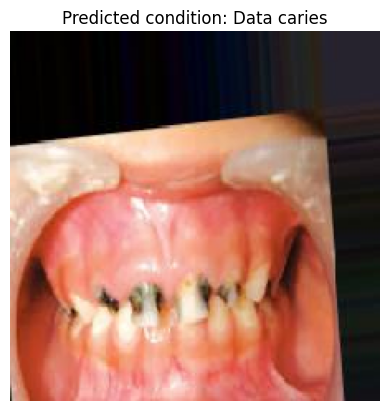

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array_expanded)
    class_index = np.argmax(predictions)
    class_labels = list(train_data.class_indices.keys())
    predicted_label = class_labels[class_index]

    # Show the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted condition: {predicted_label}")
    plt.show()


Saving dental.jpg to dental (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


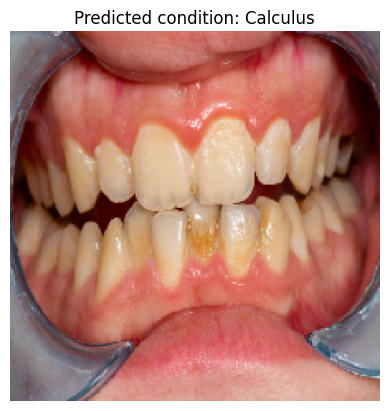

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array_expanded)
    class_index = np.argmax(predictions)
    class_labels = list(train_data.class_indices.keys())
    predicted_label = class_labels[class_index]

    # Show the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted condition: {predicted_label}")
    plt.show()


Saving dental3.jpeg to dental3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


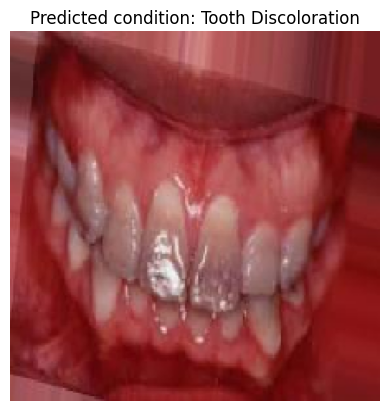

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array_expanded)
    class_index = np.argmax(predictions)
    class_labels = list(train_data.class_indices.keys())
    predicted_label = class_labels[class_index]

    # Show the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted condition: {predicted_label}")
    plt.show()


In [ ]:
model.save("dental_condition_model.h5")
